# How random numbers are generated on a computer

### A pseudorandom number generator (PRNG), also known as a deterministic random bit generator (DRBG),is an algorithm for generating a sequence of numbers whose properties approximate the properties of sequences of random numbers. The PRNG-generated sequence is not truly random, because it is completely determined by an initial value, called the PRNG's seed (which may include truly random values). Although sequences that are closer to truly random can be generated using hardware random number generators, pseudorandom number generators are important in practice for their speed in number generation and their reproducibility.PRNGs are central in applications such as simulations (e.g. for the Monte Carlo method), electronic games (e.g. for procedural generation), and cryptography. Cryptographic applications require the output not to be predictable from earlier outputs, and more elaborate algorithms, which do not inherit the linearity of simpler PRNGs, are needed.Good statistical properties are a central requirement for the output of a PRNG. In general, careful mathematical analysis is required to have any confidence that a PRNG generates numbers that are sufficiently close to random to suit the intended use. John von Neumann cautioned about the misinterpretation of a PRNG as a truly random generator, joking that "Anyone who considers arithmetical methods of producing random digits is, of course, in a state of sin."See also "https://en.wikipedia.org/wiki/Procedural_generation"

# 1 . Gen WGN

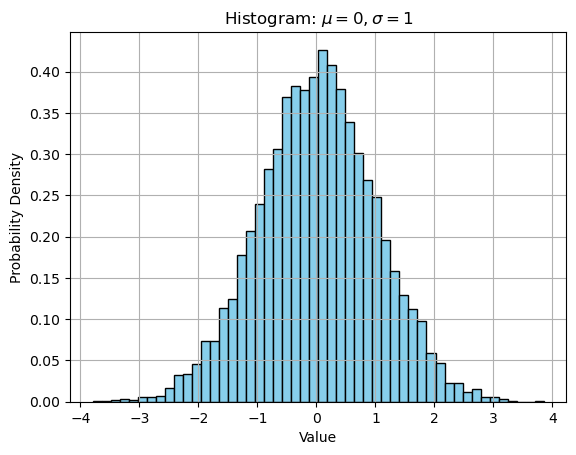

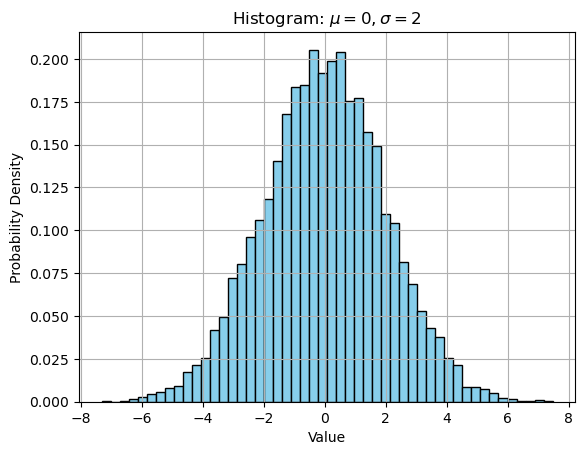

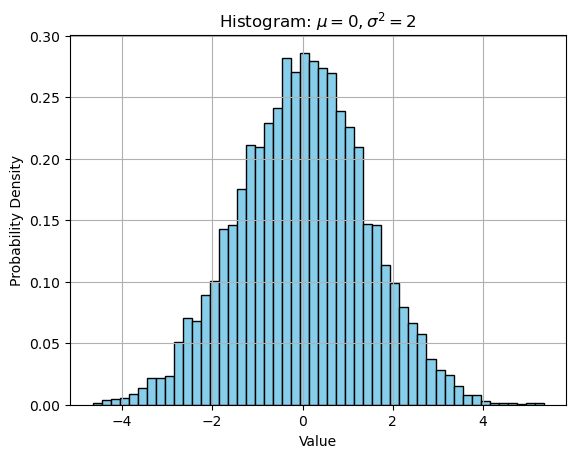

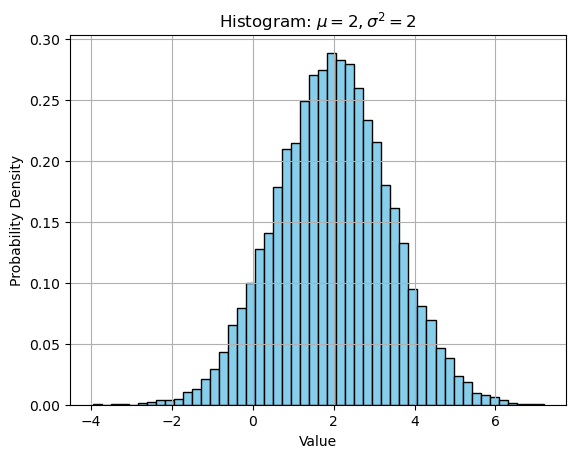

$\mu = 0, \sigma = 1$: mean = 0.0192, std = 0.9910

$\mu = 0, \sigma = 2$: mean = -0.0050, std = 1.9973

$\mu = 0, \sigma^2 = 2$: mean = 0.0083, std = 1.4152

$\mu = 2, \sigma^2 = 2$: mean = 1.9888, std = 1.3994

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Sample numbers
nSampls = 10000

#Params
x1 = np.random.normal(loc = 0, scale = 1, size = nSampls)               # μ=0, σ=1
x2 = np.random.normal(loc = 0, scale = 2, size = nSampls)               # μ=0, σ=2
x3 = np.random.normal(loc = 0, scale = np.sqrt(2), size = nSampls)      # μ=0, σ²=2
x4 = np.random.normal(loc = 2, scale = np.sqrt(2), size = nSampls)      # μ=2, σ²=2

# Add to list
samples = [x1, x2, x3, x4]
titles = [
    r'$\mu = 0, \sigma = 1$',
    r'$\mu = 0, \sigma = 2$',
    r'$\mu = 0, \sigma^2 = 2$',
    r'$\mu = 2, \sigma^2 = 2$'
]

# Plot 
for i in range(4):
    plt.figure()
    plt.hist(samples[i], bins=50, density=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram: {titles[i]}')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.show()

# Mean and Std
for i, x in enumerate(samples):
    mu = np.mean(x)
    sigma = np.std(x)
    display(Markdown(f'{titles[i]}: mean = {mu:.4f}, std = {sigma:.4f}'))

## Challenge exercise

Theoretical covariance matrix C：
 [[2.  0.5 0.3]
 [0.5 1.5 0.4]
 [0.3 0.4 1. ]]

Sample covariance matrix：
 [[1.97710182 0.52342262 0.27984617]
 [0.52342262 1.49099348 0.39036235]
 [0.27984617 0.39036235 0.98788167]]


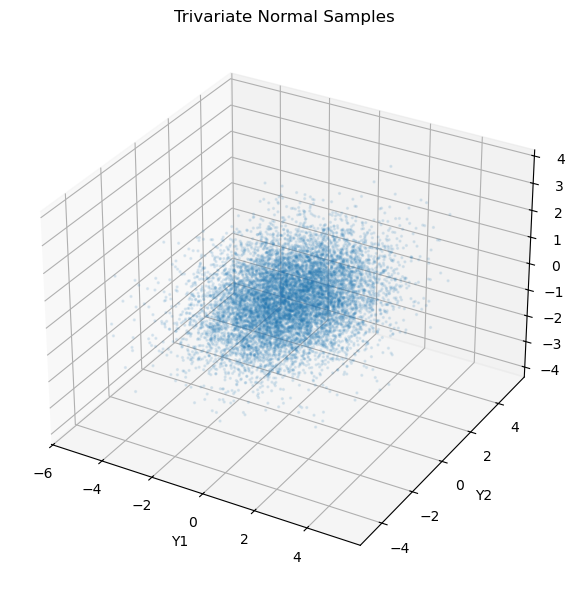

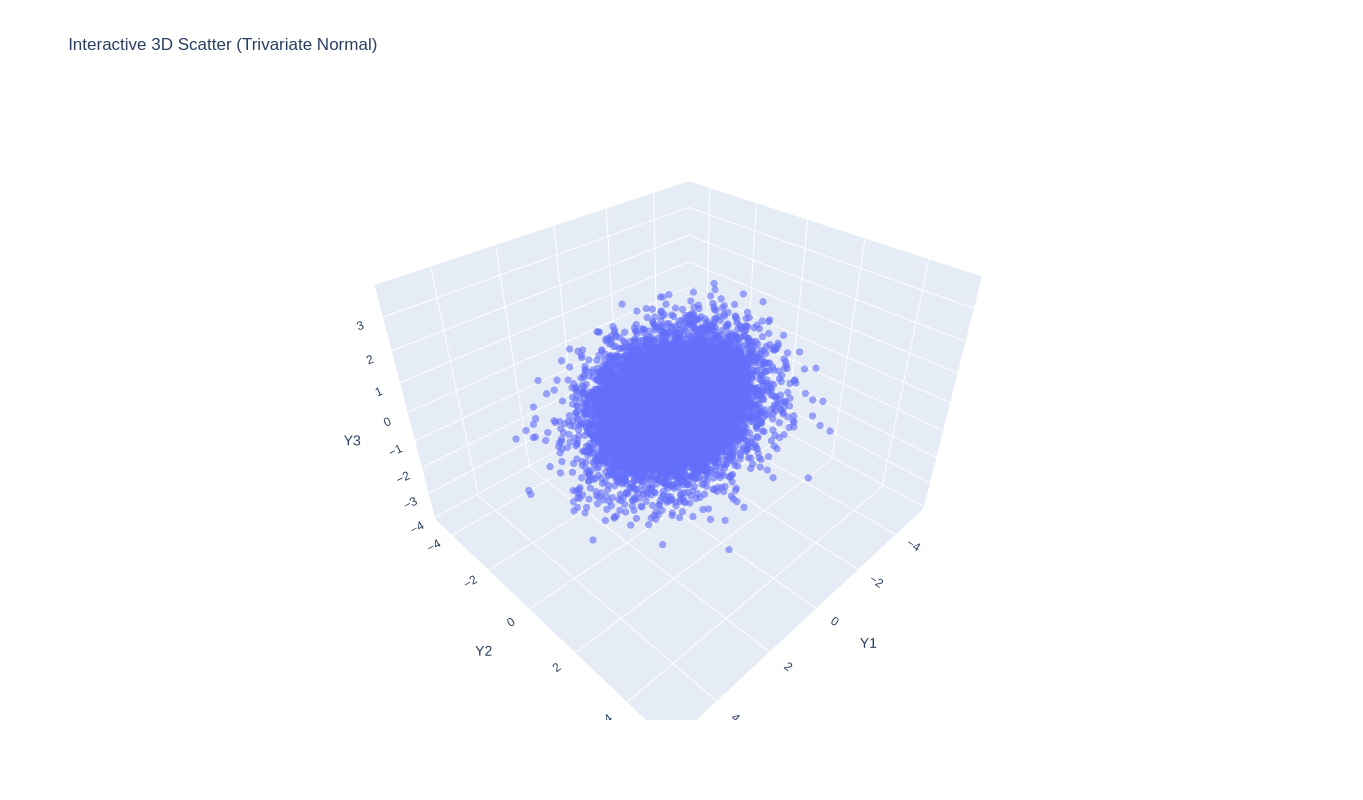

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider

# Generate a covariance matrix C（symmetric and positive definite）
C = np.array([[2.0, 0.5, 0.3],
              [0.5, 1.5, 0.4],
              [0.3, 0.4, 1.0]])  # Cij=Cov(Xi,Xj)=E[(Xi−μi)(Xj−μj)]

# C = A @ A.T
A = np.linalg.cholesky(C)

# Generate three independent varables X ~ N(0, I)
n_samples = 10000
X = np.random.randn(3, n_samples)  # shape (3, N)

# Linear transform Y = A X ⇒ Y ~ N(0, C)
Y0 = A @ X
Y = Y0.T

# Vertify covariance
print("Theoretical covariance matrix C：\n", C)
print("\nSample covariance matrix：\n", np.cov(Y.T))    #Each row is considered a trial value

# Plot 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], s=2, alpha=0.1)
ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')
plt.title("Trivariate Normal Samples")
plt.tight_layout()
plt.show()

# 3D interactive
fig = go.Figure(data=[go.Scatter3d(
    x=Y0[0], y=Y0[1], z=Y0[2],
    mode='markers',
    marker=dict(size=2, opacity=0.6)
)])

fig.update_layout(scene=dict(
    xaxis_title='Y1',
    yaxis_title='Y2',
    zaxis_title='Y3'),
    title='Interactive 3D Scatter (Trivariate Normal)',
    width=800,
    height=800              
)
fig.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plot_correlated(theta_deg):
    rho = np.sin(np.radians(theta_deg))
    C = np.array([[1.0, rho],
                  [rho, 1.0]])
    A = np.linalg.cholesky(C)
    
    N = 1000
    X = np.random.randn(2, N)
    Y = A @ X

    plt.figure(figsize=(5,5))
    plt.scatter(Y[0], Y[1], alpha=0.3)
    plt.title(f'rho = {rho:.2f}, theta = {theta_deg:.0f}°')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

interact(plot_correlated, theta_deg=FloatSlider(min=0, max=90, step=1, value=30))


interactive(children=(FloatSlider(value=30.0, description='theta_deg', max=90.0, step=1.0), Output()), _dom_cl…

<function __main__.plot_correlated(theta_deg)>

# 2 . Coloring and whitening

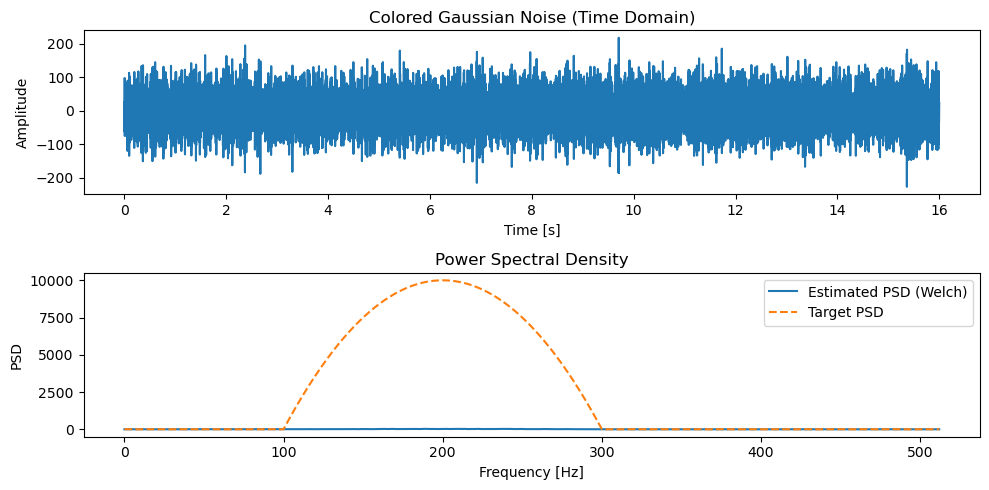

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Params
fs = 1024  
nSample = 16384  
t = np.arange(nSample) / fs

# Generate white noise
white_noise = np.random.randn(n)

# Construct PSD S_out(f)
f = np.fft.rfftfreq(nSample, d=1/fs)  # 单边频率
S_out = np.zeros_like(f)
mask = (f >= 100) & (f <= 300)
S_out[mask] = (f[mask] - 100) * (300 - f[mask])

# Construct transit function T(f) = sqrt(S_out(f))
T_f = np.sqrt(S_out)

# Apply filter to white noise
W_f = np.fft.rfft(white_noise)
Y_f = W_f * T_f
colored_noise = np.fft.irfft(Y_f, n)

# Vertify PSD (Welch method)
f_welch, Pxx = welch(colored_noise, fs=fs, nperseg=1024)

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(t, colored_noise)
plt.title("Colored Gaussian Noise (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(f_welch, Pxx, label="Estimated PSD (Welch)")
plt.plot(f, S_out, label="Target PSD", linestyle='--')
plt.title("Power Spectral Density")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD")
plt.legend()
plt.tight_layout()
plt.show()
